# EDA Take Home Assignment 1
Sayan De(FT252082)

Section 1



In [110]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [111]:
#version of libraries
print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
from sklearn import __version__
print("scikitlearn version :",__version__)
from platform import python_version
print("Python version: ",python_version())

Pandas version : 2.2.2
Numpy version:  1.26.4
scikitlearn version : 1.5.2
Python version:  3.10.12


## Load the Data

In [112]:
car_data = pd.read_csv('/content/data.csv')

In [113]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [114]:
#checking last few rows
car_data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [115]:
#meta data
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

one-line meta information for each attribute:

1. **Make**: Vehicle brand (String, various brands).
2. **Model**: Vehicle model name (String, unique per vehicle).
3. **Year**: Manufacturing year (Integer).
4. **Engine Fuel Type**: Type of fuel (String).
5. **Engine HP**: Horsepower of engine (Float).
6. **Engine Cylinders**: Number of engine cylinders (Float).
7. **Transmission Type**: Type of transmission (String, Automatic/Manual).
8. **Driven_Wheels**: Wheel drive type (String, e.g., AWD, FWD).
9. **Number of Doors**: Vehicle doors count (Float, 2-4).
10. **Market Category**: Vehicle market segment (String, e.g., Luxury, Crossover).
11. **Vehicle Size**: Size classification (String, Compact/Midsize/Large).
12. **Vehicle Style**: Body style of vehicle (String, e.g., Sedan, SUV).
13. **highway MPG**: Highway miles per gallon (Integer, 12-354 MPG).
14. **city mpg**: City miles per gallon (Integer, 7-137 MPG).
15. **Popularity**: Popularity score (Integer, varies by model).
16. **MSRP**: Manufacturer's suggested retail price (Integer).

In [116]:
#value range for each numeric columns
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#Acknowledgement

- Source : Scraped from Edmunds and Twitter

- Acknowledgements : Edmunds and Twitter for providing info ,Sam Keene

## Sanity Check

In [117]:
car_data.shape

(11914, 16)

For this dataset, with 11,914 rows and 16 columns, the depth (number of instances) is much larger than the breadth (number of variables). This suggests the dataset has sufficient data points for reliable analysis, like regression

In [118]:
car_data.memory_usage(deep=True)  # memory usage in bytes

,0
Index,128
Make,757202
Model,765437
Year,95312
Engine Fuel Type,920308
Engine HP,95312
Engine Cylinders,95312
Transmission Type,782067
Driven_Wheels,872156
Number of Doors,95312


In [119]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Adjusting the Data types by downcasting to save memory usage

Year: Fits within int16 (1990-2017). Downcasting from int64 reduces memory usage.

Engine HP: Ranges from 55 to 1001, suitable for float32. Downcasting from float64 saves memory while maintaining precision.

Engine Cylinders: Values from 0 to 16 fit in float32. Downcasting from float64 optimizes memory.

Number of Doors: Ranges from 2 to 4, appropriate for float32. Downcasting from float64 is efficient.

Highway MPG & City MPG: Ranges (12-354, 7-137) fit in int16. Downcasting from int64 reduces memory.

Popularity: Ranges from 2 to 5567, fitting in int16 or int32. Downcasting from int64 lowers memory consumption.

MSRP: Ranges from 2000 to 2,065,902, suitable for int32. Downcasting from int64 is appropriate.

In [120]:
# downsizing Numerical variables size
data_copy = car_data.copy()
data_copy['Year'] = pd.to_numeric(data_copy['Year'], downcast='unsigned')
data_copy['highway MPG'] = pd.to_numeric(data_copy['highway MPG'], downcast='unsigned')
data_copy['city mpg'] = pd.to_numeric(data_copy['city mpg'], downcast='unsigned')
data_copy['Popularity'] = pd.to_numeric(data_copy['Popularity'], downcast='unsigned')
data_copy['MSRP'] = pd.to_numeric(data_copy['MSRP'], downcast='unsigned')

data_copy['Engine HP'] = pd.to_numeric(data_copy['Engine HP'], downcast='float')
data_copy['Engine Cylinders'] = pd.to_numeric(data_copy['Engine Cylinders'], downcast='float')
data_copy['Number of Doors'] = pd.to_numeric(data_copy['Number of Doors'], downcast='float')


## Memory usage after downcasting

In [121]:
  #reduced memory usage
data_copy.memory_usage(deep=True)

,0
Index,128
Make,757202
Model,765437
Year,23828
Engine Fuel Type,920308
Engine HP,47656
Engine Cylinders,47656
Transmission Type,782067
Driven_Wheels,872156
Number of Doors,47656


In [122]:
# in MB
memory_usage = car_data.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Total memory space occupied by the data: {memory_usage:.2f} MB")

Total memory space occupied by the data: 6.78 MB


In [123]:
memory_usage = data_copy.memory_usage(deep=True).sum() / (1024 ** 2)  # in MB
print(f"Total memory space occupied by the data: {memory_usage:.2f} MB")

Total memory space occupied by the data: 6.32 MB


## Columns with wrong data types

Year: Should be converted from integer to category to represent discrete years effectively.

Engine Cylinders: Should be changed from float64 to int32 as it represents whole numbers.

Number of Doors: Convert from float64 to int32 to reflect its integer nature.

Categorical Columns (e.g., Make, Model, Engine Fuel Type)can be converted from object to category for more efficient processing and analysis.

## Challenges

In [124]:
#missing values
car_data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [125]:
# Assuming df is your DataFrame
missing_columns = ['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']
missing_values_rows = car_data[car_data[missing_columns].isnull().any(axis=1)][missing_columns]

# Display the rows with missing values for specific columns
missing_values_rows

,Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category
87,regular unleaded,115.0,4.0,2.0,NaN
88,regular unleaded,115.0,4.0,2.0,NaN
91,regular unleaded,115.0,4.0,2.0,NaN
92,regular unleaded,115.0,4.0,2.0,NaN
93,regular unleaded,115.0,4.0,2.0,NaN
...,...,...,...,...,...
11794,regular unleaded,145.0,6.0,2.0,NaN
11809,regular unleaded,106.0,4.0,4.0,NaN
11810,regular unleaded,106.0,4.0,4.0,NaN
11867,premium unleaded (recommended),420.0,8.0,4.0,NaN


# Missing Values

### Missing data Instansces

- Market Category was for 3742 entries, which is completely random(no patterns noticed in the dataset) -> MCAR

- Engine Fuel type has 3 missing records -> all the 3 records are of Suzuki, Verona, 2004, Automatic midsize Sedan, even the city and highway mpg every attribute is similar other than MSRP ->MNAR

- Engine HP => MAR
- Engine Cyl -> 30 blank = 20 of them are Mazda RX7,RX88 -> MNAR
- No of Doors -> 6 blank = 5 of the records are of Tesla, Model S, 2016 , Electric, Large, Sedan : we can observe this pattern and this record has Engine HP missing as well, so MNAR

## Strategy to address the missing value issue

- Strategy for Addressing Missing Values


1. Object (Categorical) Variables:

- Impute with Mode: For categorical columns with missing values, such as Market Category  I will use the mode (most frequent value) for imputation.

- Reason: Mode imputation is effective for categorical data as it fills missing values with the most commonly occurring category. This is a straightforward and suitable approach for variables with no specific dependencies or patterns related to missingness. It helps maintain the distribution of categories without introducing much bias.

2. Numeric Variables:

- K-Nearest Neighbors (KNN) Imputation: For numerical columns, such as Engine HP, Engine Cylinders, and Number of Doors, I will use KNN imputation.

- Reason: KNN considers the similarity between observations, allowing it to use values from other records with similar characteristics to estimate missing values. This method is well-suited for MNAR and MAR cases, as it leverages patterns in the data and maintains relationships between attributes.


Reason to choose KNN over other imputation techniques :
Alternative Methods Considered: Mean or median imputation would not capture patterns in data as accurately as KNN, especially in cases where missingness is related to other attributes (e.g., specific car models or fuel types). KNN’s ability to use multiple features makes it more robust, especially for a dataset with varied numerical ranges and correlations.



In [126]:
car_data.select_dtypes(exclude='object').columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [127]:
missing_columns_cont = ['Engine HP', 'Engine Cylinders', 'Number of Doors']

## Plotting the distribution for Numerical Columns which has missing datas

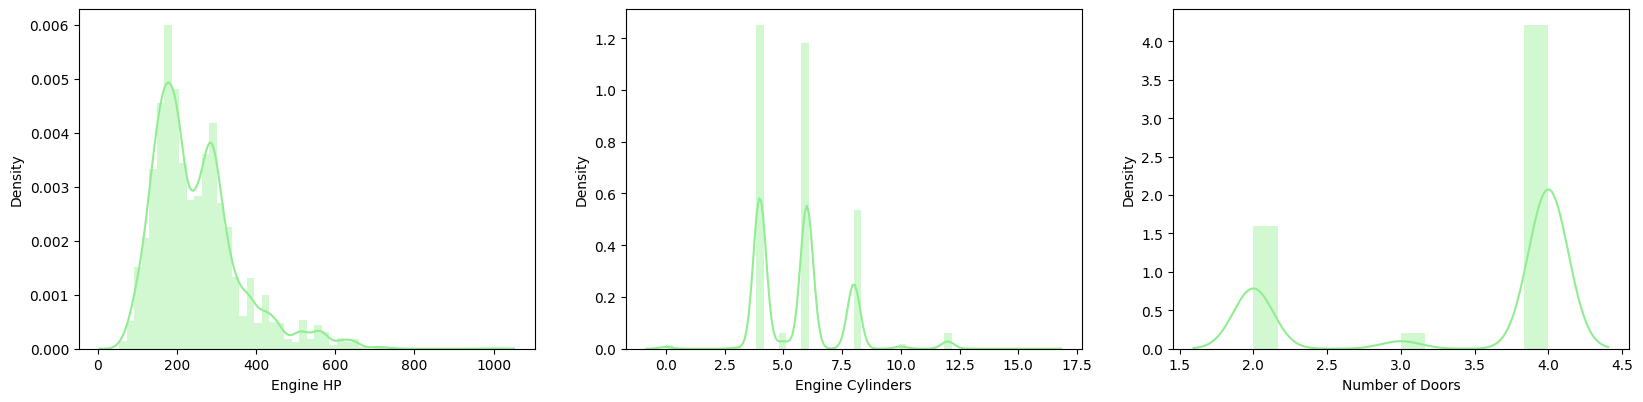

In [128]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(car_data['Engine HP'], color='lightgreen')

plt.subplot(3,3,2)
sns.distplot(car_data['Engine Cylinders'], color='lightgreen')

plt.subplot(3,3,3)
sns.distplot(car_data['Number of Doors'], color='lightgreen')

plt.show()

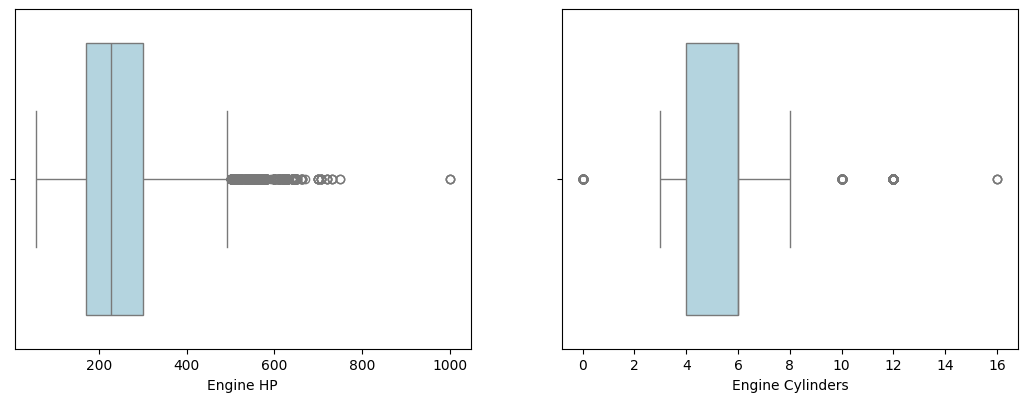

In [129]:
#using boxplots to visualise the outliers
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= car_data['Engine HP'], color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= car_data['Engine Cylinders'], color='lightblue')

plt.show()

Using KNN to impute missing values

In [130]:
from sklearn.impute import KNNImputer

In [131]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
data_imputed_knn =  pd.DataFrame(imputer.fit_transform(car_data[missing_columns_cont]), columns = missing_columns_cont)

In [132]:
data_imputed_knn.isnull().sum()

,0
Engine HP,0
Engine Cylinders,0
Number of Doors,0


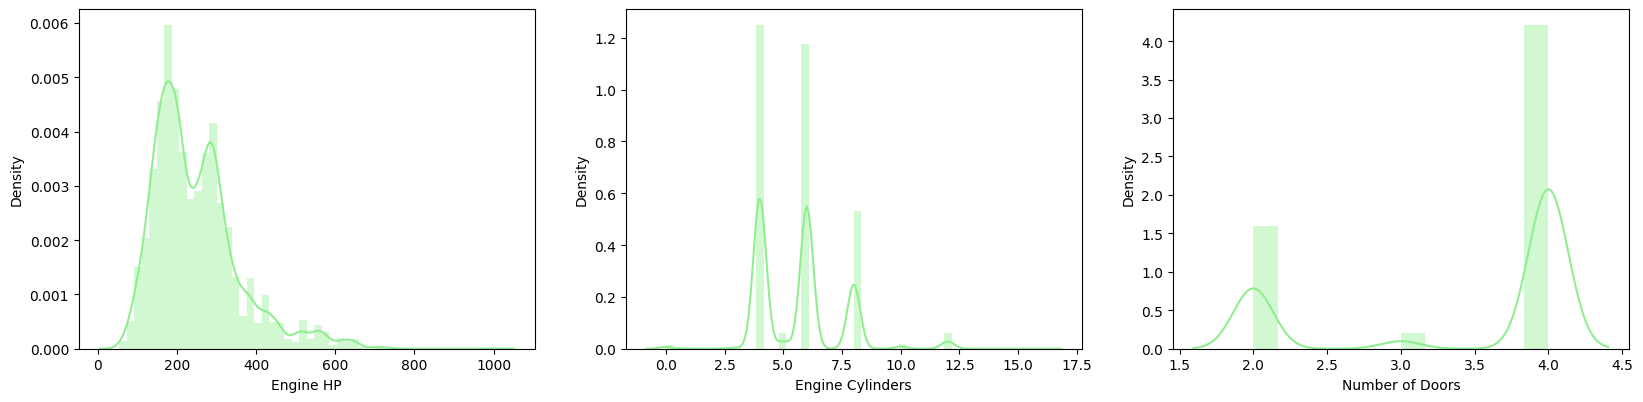

In [133]:
# Distribution of missing value columns after KNN imputation
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(data_imputed_knn['Engine HP'], color='lightgreen')

plt.subplot(3,3,2)
sns.distplot(data_imputed_knn['Engine Cylinders'], color='lightgreen')

plt.subplot(3,3,3)
sns.distplot(data_imputed_knn['Number of Doors'], color='lightgreen')

plt.show()

## Hypothesis:




- Null Hypothesis (H₀): The distribution of the numerical columns after KNN imputation is statistically indistinguishable from the original distribution (i.e., there is no significant difference).

- Alternative Hypothesis (H₁): The distribution of the numerical columns after KNN imputation is significantly different from the original distribution.

As we can observe, after applying KNN imputation, the distribution of the numerical columns remains consistent with the original dataset. This outcome supports the null hypothesis that KNN imputation does not significantly alter the distribution, confirming its suitability for preserving the original data structure.

# Visualization

In [134]:
car_data_obj.columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [135]:
car_data_cat = [ 'Engine Fuel Type', 'Transmission Type','Driven_Wheels', 'Vehicle Size', 'Vehicle Style']

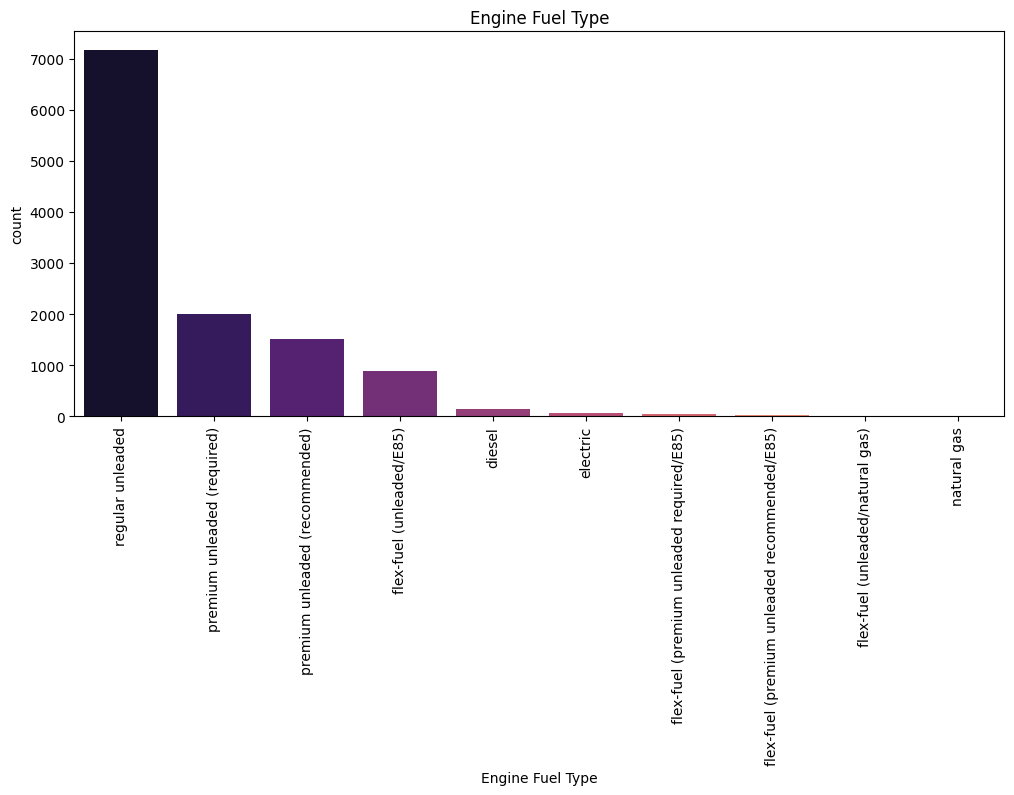

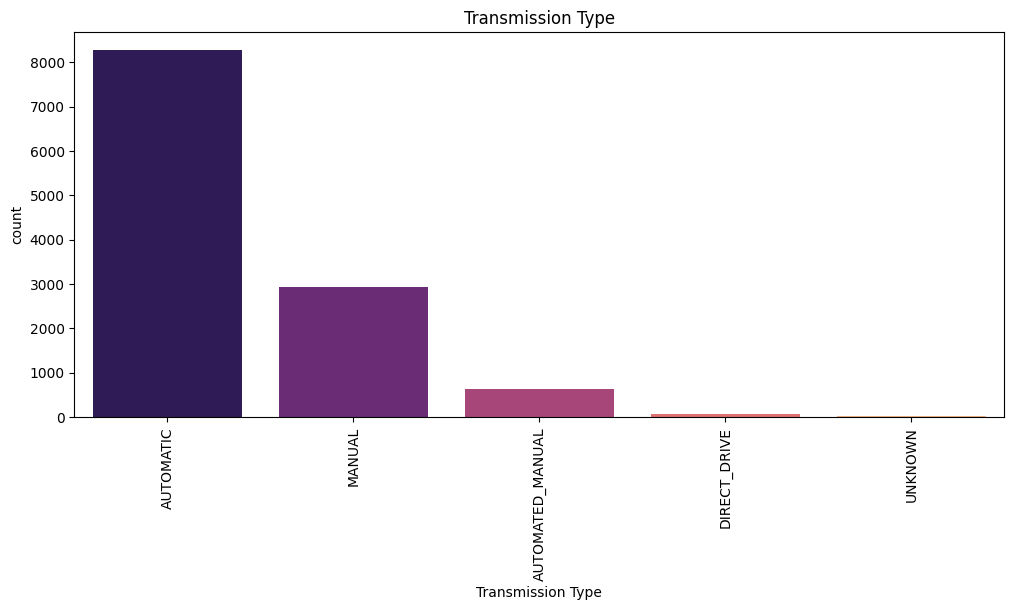

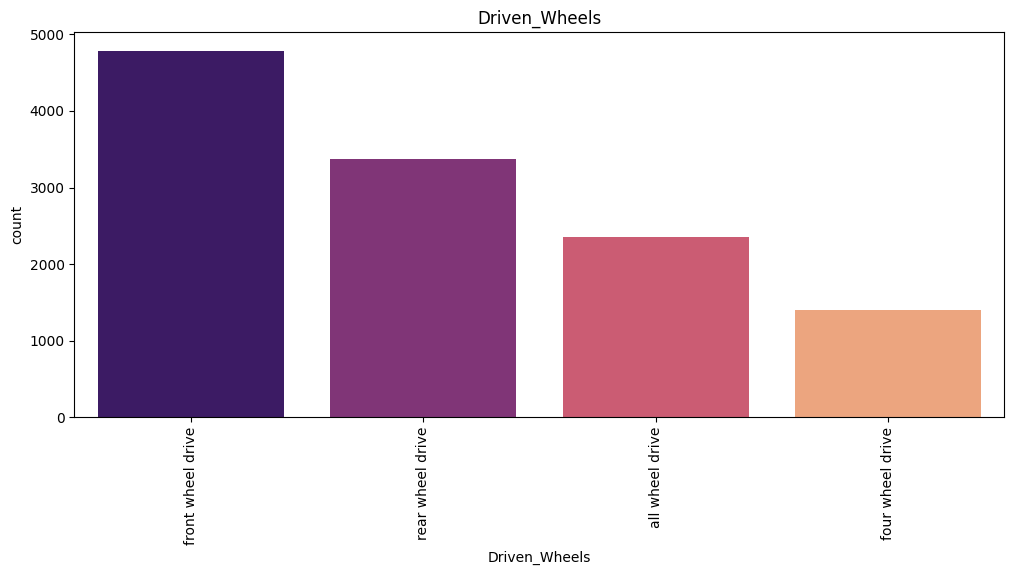

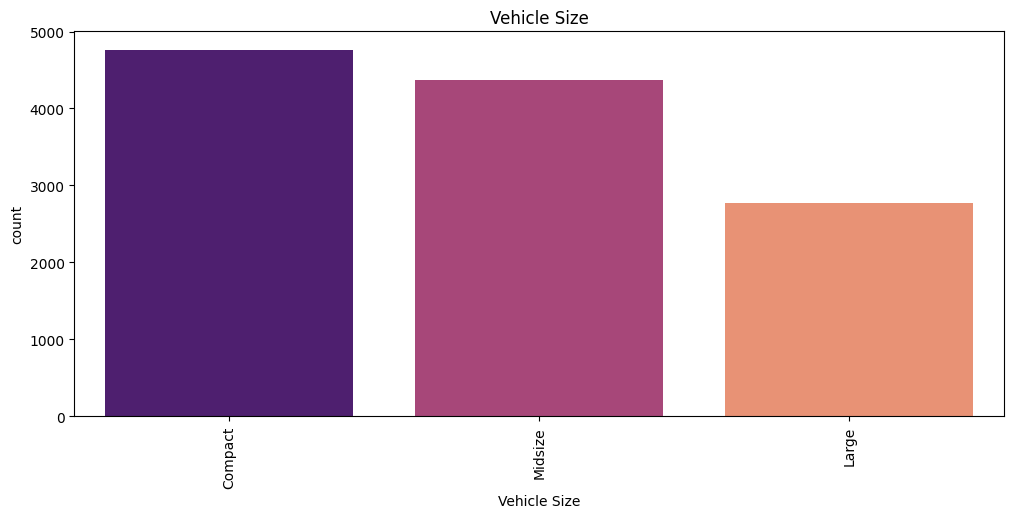

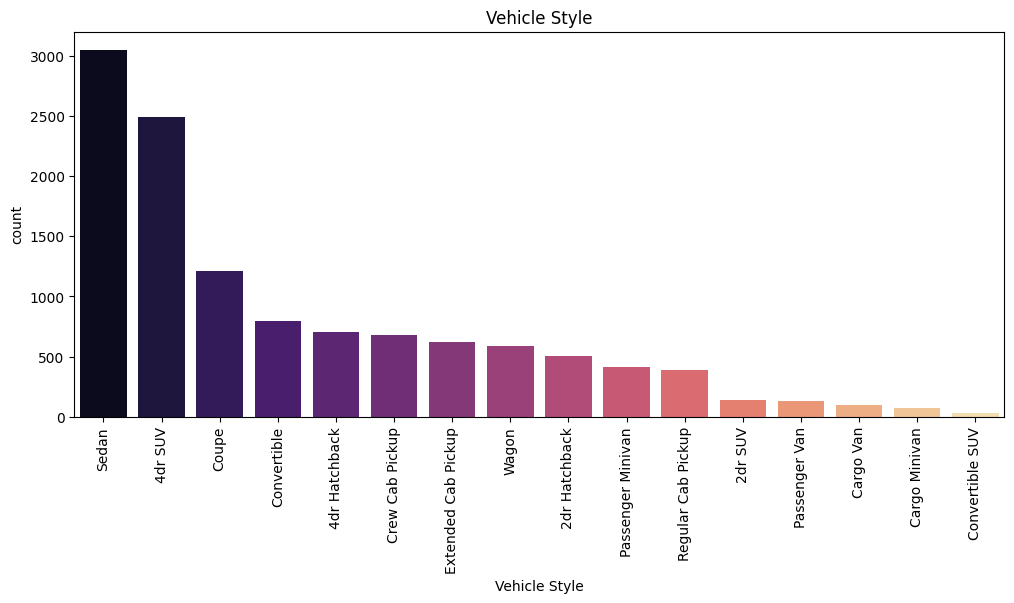

In [136]:
for col in car_data_cat:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=car_data[col].value_counts().index, y=car_data[col].value_counts(), palette = 'magma')
    plt.title(col)
    plt.xticks(rotation = 90)
    plt.show()

In [137]:
car_data.select_dtypes(exclude='object').columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [138]:
car_data_cont = ['Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP']

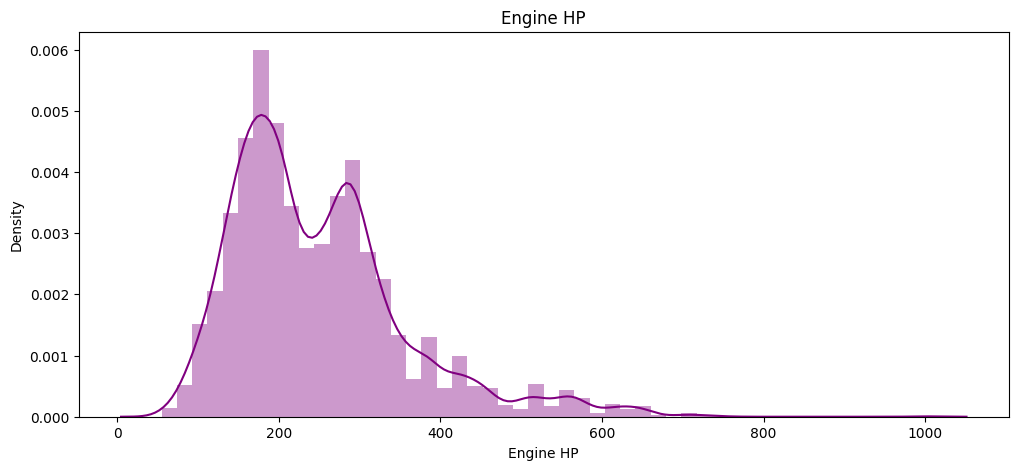

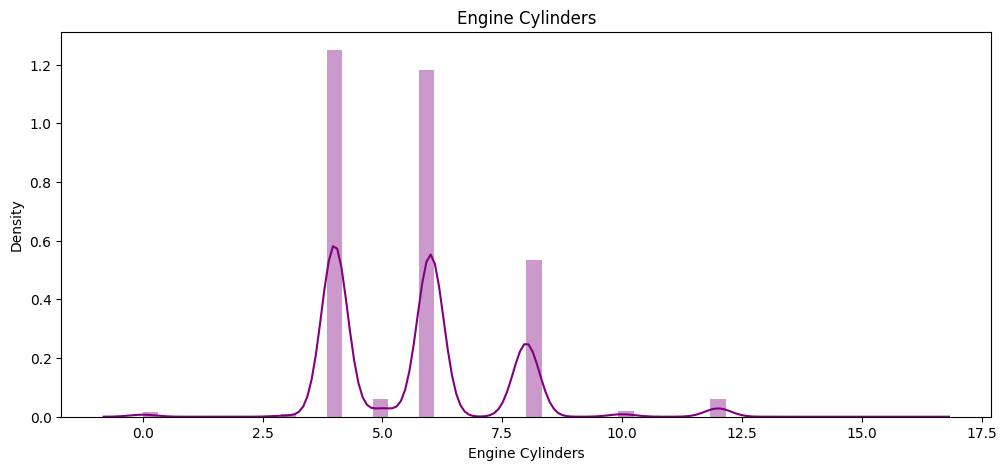

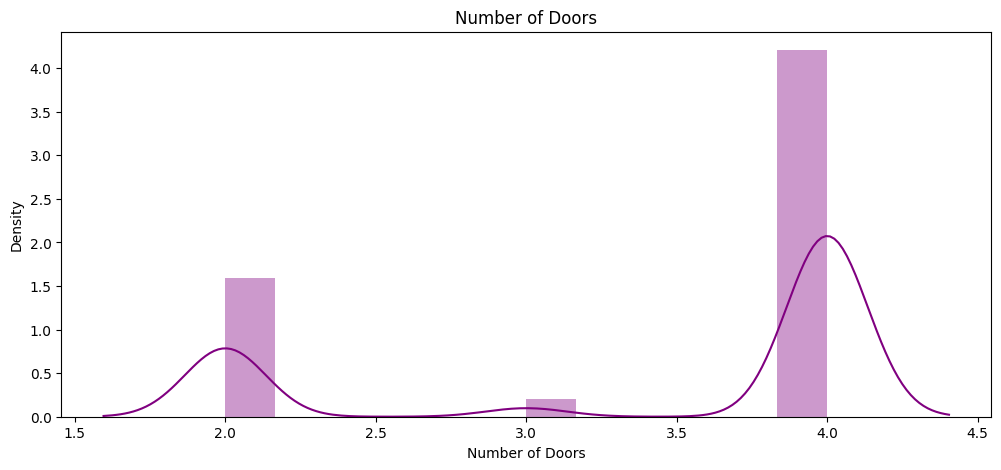

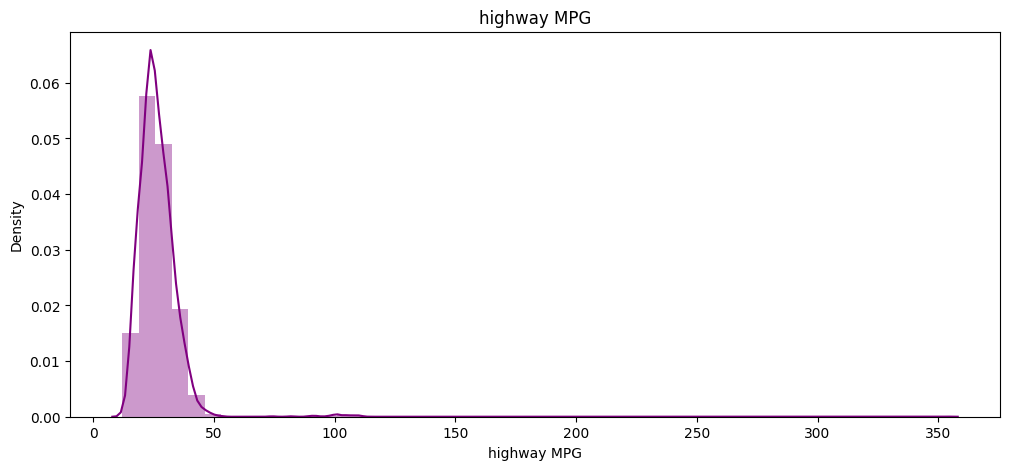

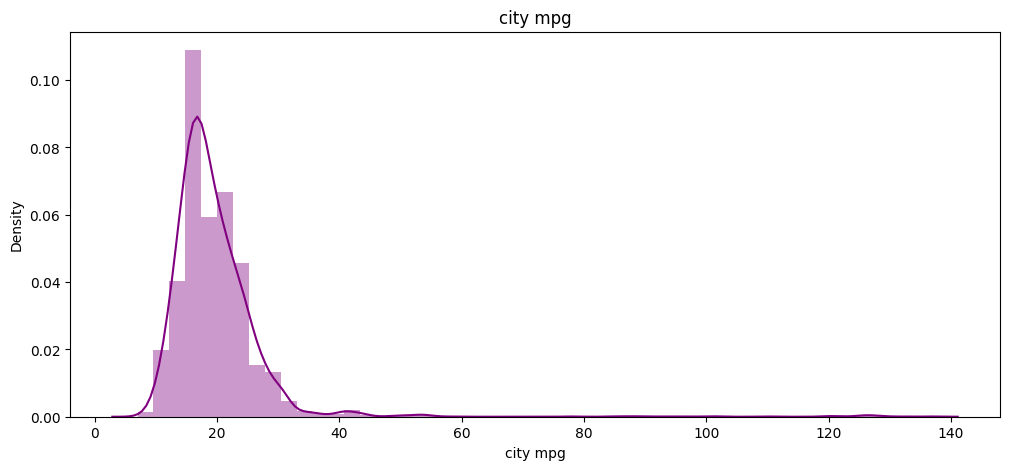

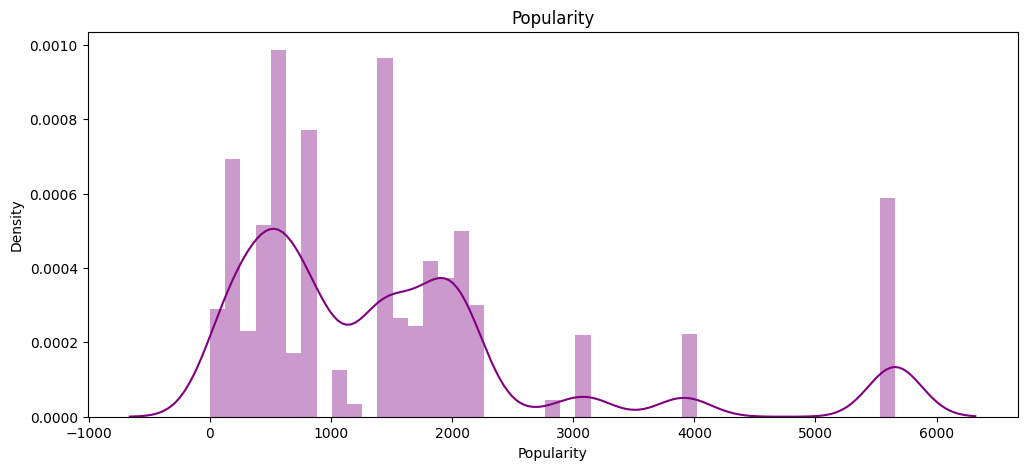

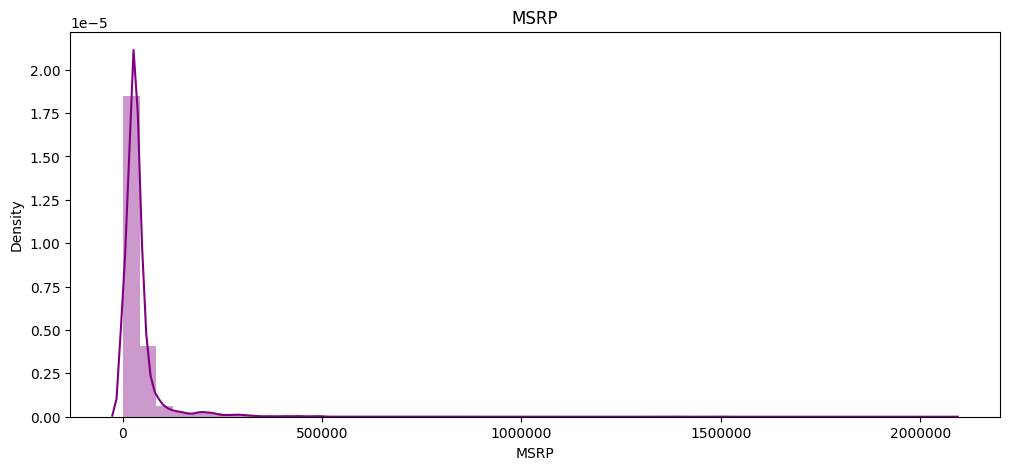

In [139]:
for col in car_data_cont:
    plt.figure(figsize=(12, 5))
    sns.distplot(car_data[col], color='purple')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(col)

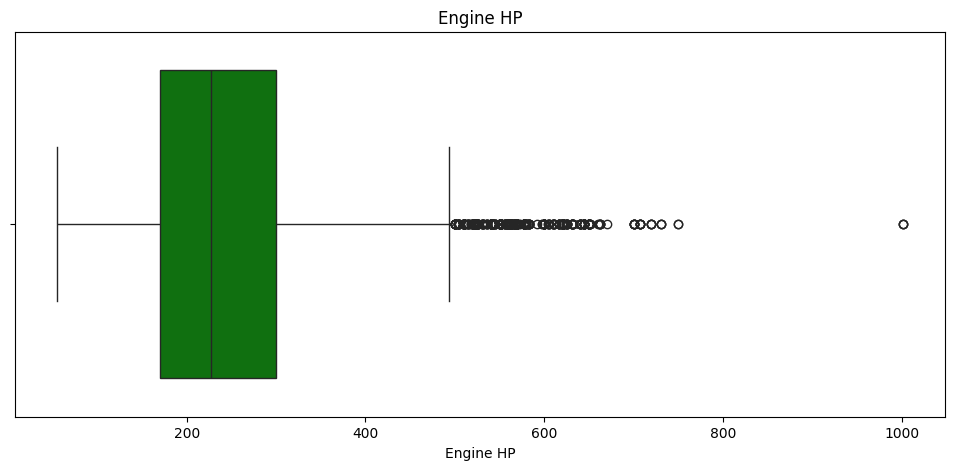

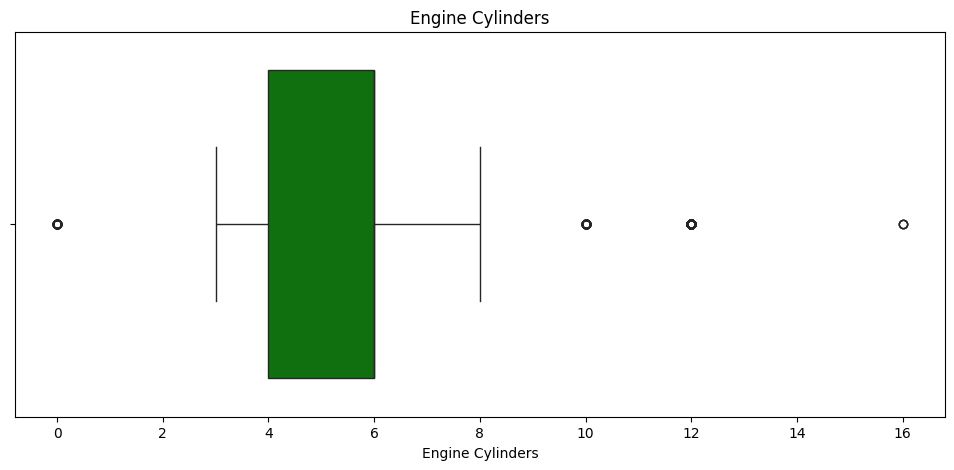

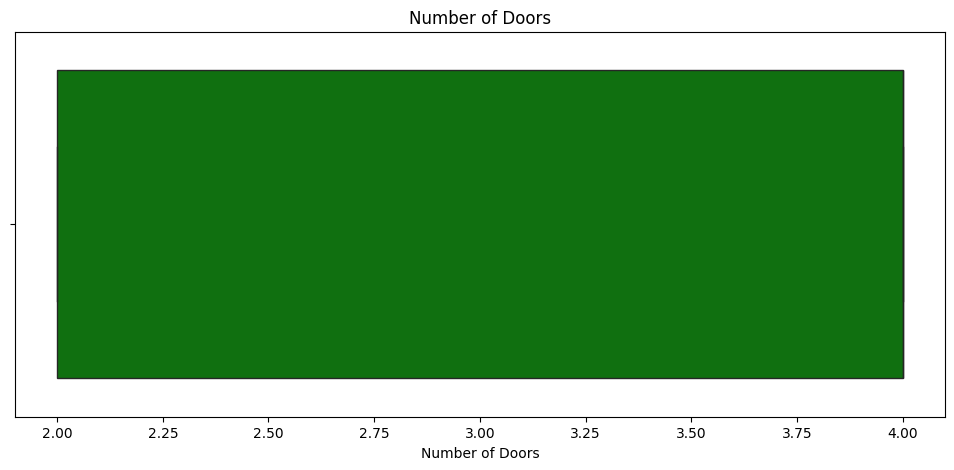

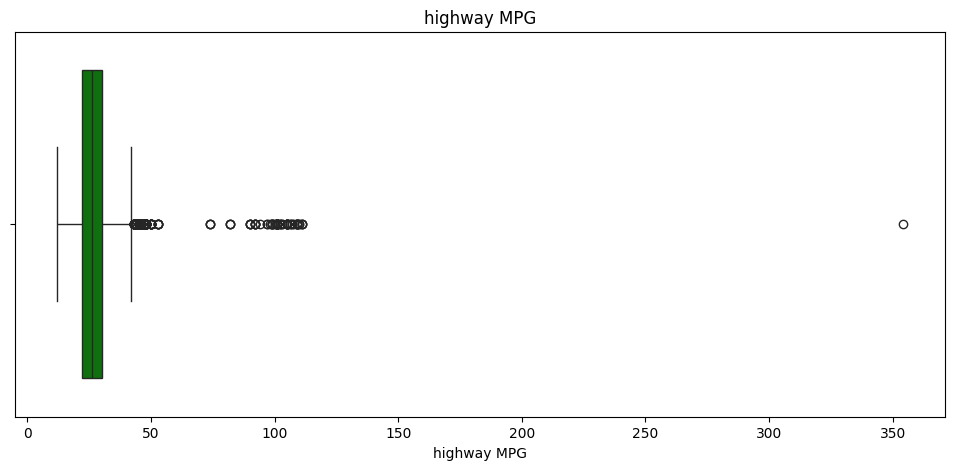

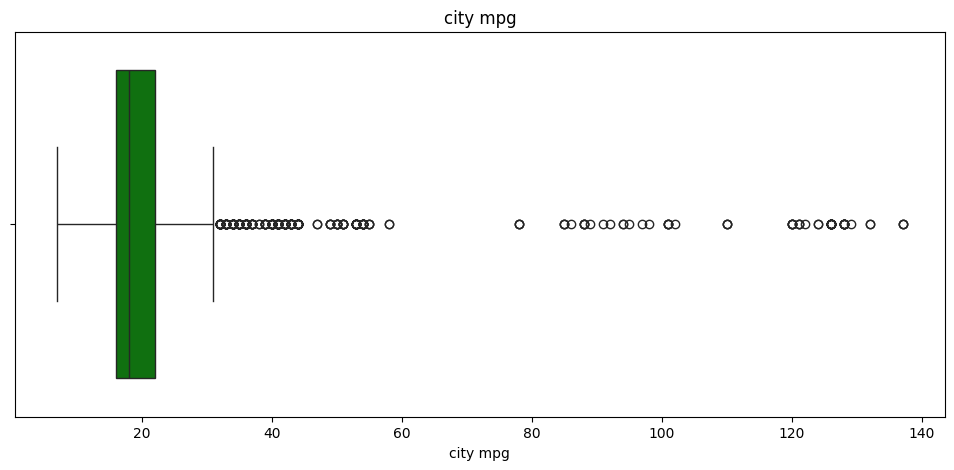

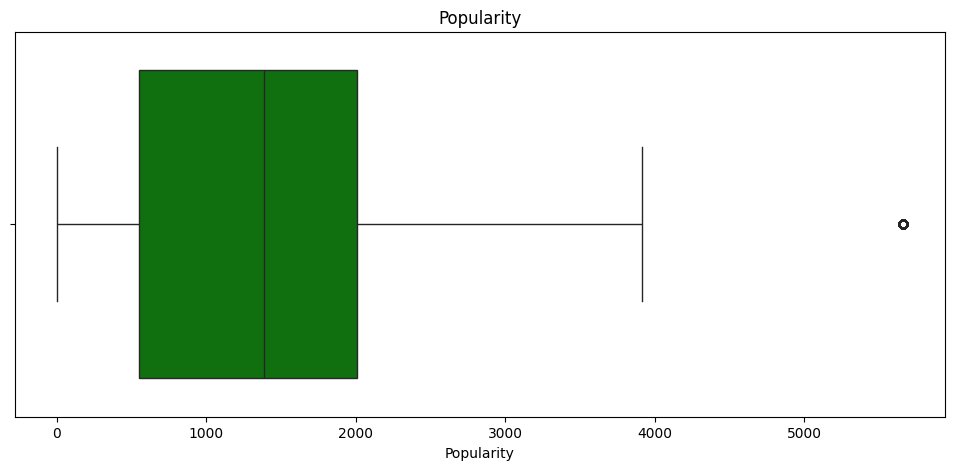

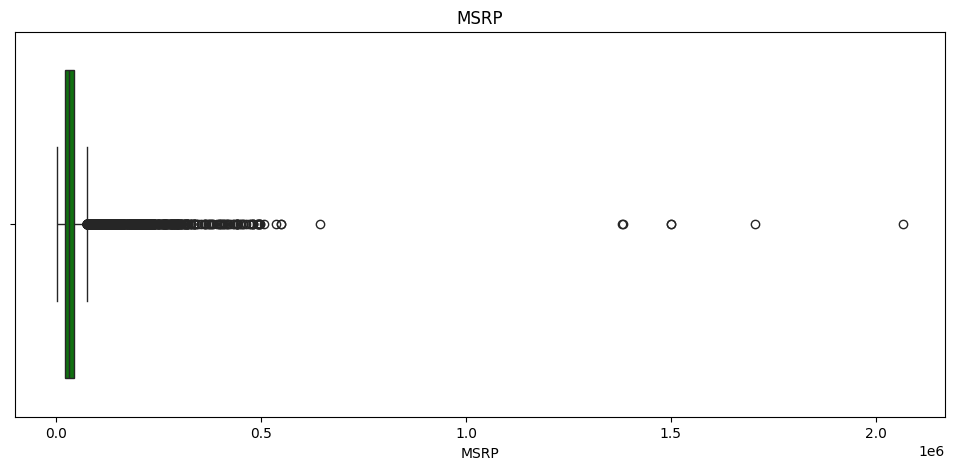

In [140]:
for col in car_data_cont:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=car_data[col], color='green')
    plt.title(col)

## Analysis/Interpretation

Categorical columns -

1. Reguklar unleaded is most used Fuel type
2. Automatic Transmisson type is available is most cars
3. Front > Rear > All -> driven wheels
4. Compact > Midsize > Large -> in terms of Vehicle size
5. Sedan is the most used  vehicle style

Numerical Columns -

### Distribution(interpretation from the histogram/kde plot)

- Engine HP = The peak occurs near 200HP referring most vehicles having HP ner to 200, slightly right skewed

- Eng Cyl = there are 4,6,8 cyl vehicles and the values are discrete we observe this peaks, so here histogram would be preferrred more , density plot would not make much sense.for this dataset the vehicle with 4 cylinders are the majorty

- No of door = similarly the no of doors are also discrete in nature(2,3,4) and majority of the cars have 4 doors

- highway mpg = Most cars have the Highway mpg around 25~26 mpg

- city mpg =  whereas most cars have the city mpg arounf 18~19 mpg

  both mpg dist we can observe right skewness

- msrp = the distribution is heavily right skewed referring there are more no of cars with less msrp



In [141]:
car_data['Number of Doors'].value_counts()

,count
Number of Doors,
4.0,8353
2.0,3160
3.0,395


# Outlier Treatment

from the previous box plots we can observe -

- Engine JP,Engine Cylinders, Highway MPG, City MPG,Popularity(only 1) and MSRP has significant no of outliers

# Records with outliers

In [142]:
temp_out_hp= (car_data['Engine HP']>450)
outliers = temp_out_hp[temp_out_hp==True]
print(outliers)

466      True
467      True
468      True
469      True
470      True
         ... 
11509    True
11510    True
11523    True
11524    True
11525    True
Name: Engine HP, Length: 658, dtype: bool


In [143]:
car_data.iloc[outliers.index]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,BMW,X5 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11510,BMW,X5 M,2017,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11523,BMW,X6 M,2015,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102100
11524,BMW,X6 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102200


Observation -

658 outliers
1. According to the information on the web the Engine HP values are valid

In [144]:
# identifying outlier records in acc

temp_out_acc= (car_data['Engine Cylinders']<3) | (car_data['Engine Cylinders']>8)
outliers = temp_out_acc[temp_out_acc==True]
print(outliers)

460      True
461      True
462      True
463      True
464      True
         ... 
11394    True
11395    True
11448    True
11449    True
11450    True
Name: Engine Cylinders, Length: 357, dtype: bool


In [145]:
car_data.iloc[outliers.index]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
460,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,223970
461,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,219775
462,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
463,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,224585
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,13,259,208295
11395,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,13,259,223295
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025


Obseervations -

1. 357 outliers, with cyl less than 3 or greater than 8

All the vehicles in this section are Exotic, Luxury and High Perfromance cars
which has very high HP as well

In [146]:
temp_out_hp= (car_data['city mpg']>30)
outliers = temp_out_hp[temp_out_hp==True]
print(outliers)

135      True
140      True
142      True
146      True
161      True
         ... 
11355    True
11357    True
11360    True
11361    True
11810    True
Name: city mpg, Length: 438, dtype: bool


In [147]:
car_data.iloc[outliers.index]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
135,BMW,3 Series,2015,diesel,180.0,4.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,45,32,3916,39000
140,BMW,3 Series,2015,diesel,180.0,4.0,AUTOMATIC,all wheel drive,4.0,"Diesel,Luxury",Midsize,Wagon,43,31,3916,43450
142,BMW,3 Series,2015,diesel,180.0,4.0,AUTOMATIC,all wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,43,31,3916,41000
146,BMW,3 Series,2016,diesel,180.0,4.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,42,32,3916,39850
161,BMW,3 Series,2017,diesel,180.0,4.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,42,32,3916,40250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,Nissan,Versa,2016,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,31,2009,17140
11357,Nissan,Versa,2017,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,39,31,2009,17280
11360,Nissan,Versa,2017,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,39,31,2009,14130
11361,Nissan,Versa,2017,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,39,31,2009,15720


In [148]:
temp_out_hp= (car_data['MSRP']>40000)
outliers = temp_out_hp[temp_out_hp==True]
print(outliers)

0        True
1        True
6        True
12       True
15       True
         ... 
11908    True
11909    True
11910    True
11911    True
11912    True
Name: MSRP, Length: 3367, dtype: bool


In [149]:
car_data.iloc[outliers.index]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
12,BMW,1 Series,2013,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,44400
15,BMW,1 Series,2013,premium unleaded (required),320.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,25,18,3916,48250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620


Strategy to remove outliers

1. We can remove outliers brand wise when there is no such significant pattren present in the data

2. Replace outliers with KNN algorithm

3. Replace the outliers with quantile values -> capping

### Removing outliers from Engine HP and city mpg columns

In [150]:
data_copy = car_data.copy()

In [151]:
data_copy2 = data_copy.copy()

In [152]:
 # Function to replace outliers with whisker values
def replace_outliers_with_whiskers(df, col):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  # Calculate Interquartile Range (IQR)
  IQR = Q3 - Q1
  # Define the lower and upper whisker
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR

  # Replace outliers lower than the lower whisker with the lower whisker

  df[col] = df[col].apply(lambda x: lower_whisker if x < lower_whisker else x)

  # Replace outliers greater than the upper whisker with the upper whisker
  df[col] = df[col].apply(lambda x: upper_whisker if x > upper_whisker else x)

  return df


In [153]:
# craeting a test dataframe and dropping the null values from the column to get right result from t test
car_data_filtered = car_data.dropna()

In [154]:
car_data_filtered.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [155]:
# Replace outliers in 'column_name'
data = replace_outliers_with_whiskers(car_data_filtered, 'Engine HP')

data = replace_outliers_with_whiskers(car_data_filtered, 'city mpg')

<Axes: ylabel='Engine HP'>

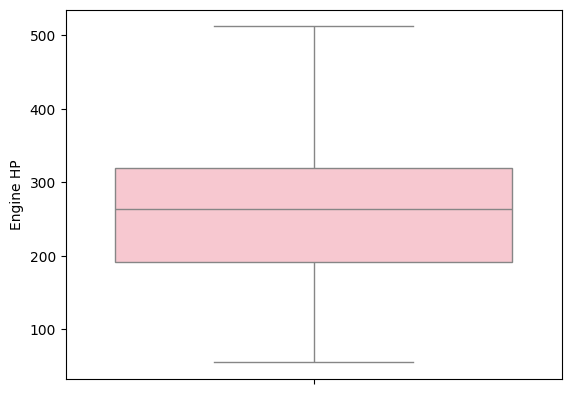

In [156]:
sns.boxplot(data['Engine HP'],color='pink')

<Axes: ylabel='city mpg'>

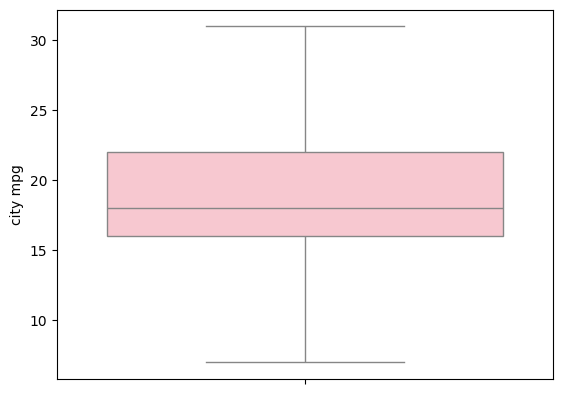

In [157]:
sns.boxplot(data['city mpg'],color='pink')

# Hypothesis Testing for impact of outlier fixing using dependent t test

In [163]:
# Ho : No significant difference in the distribution after outlier treatment
# Ha : There is a significant difference in the distribution after outlier treatment

# for hp column
t, pval= stats.ttest_ind(car_data_filtered['Engine HP'],data['Engine HP'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

1.0
accept null hypothesis


In [165]:
t, pval= stats.ttest_ind(car_data_filtered['city mpg'],data['city mpg'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

1.0
accept null hypothesis


### Remarks:

Based on hypothesis testing of the Engine HP and city mpg  column the stratergy of replacing outliers in horsepower with quartiles is OK as we fail to reject null hypothesis.

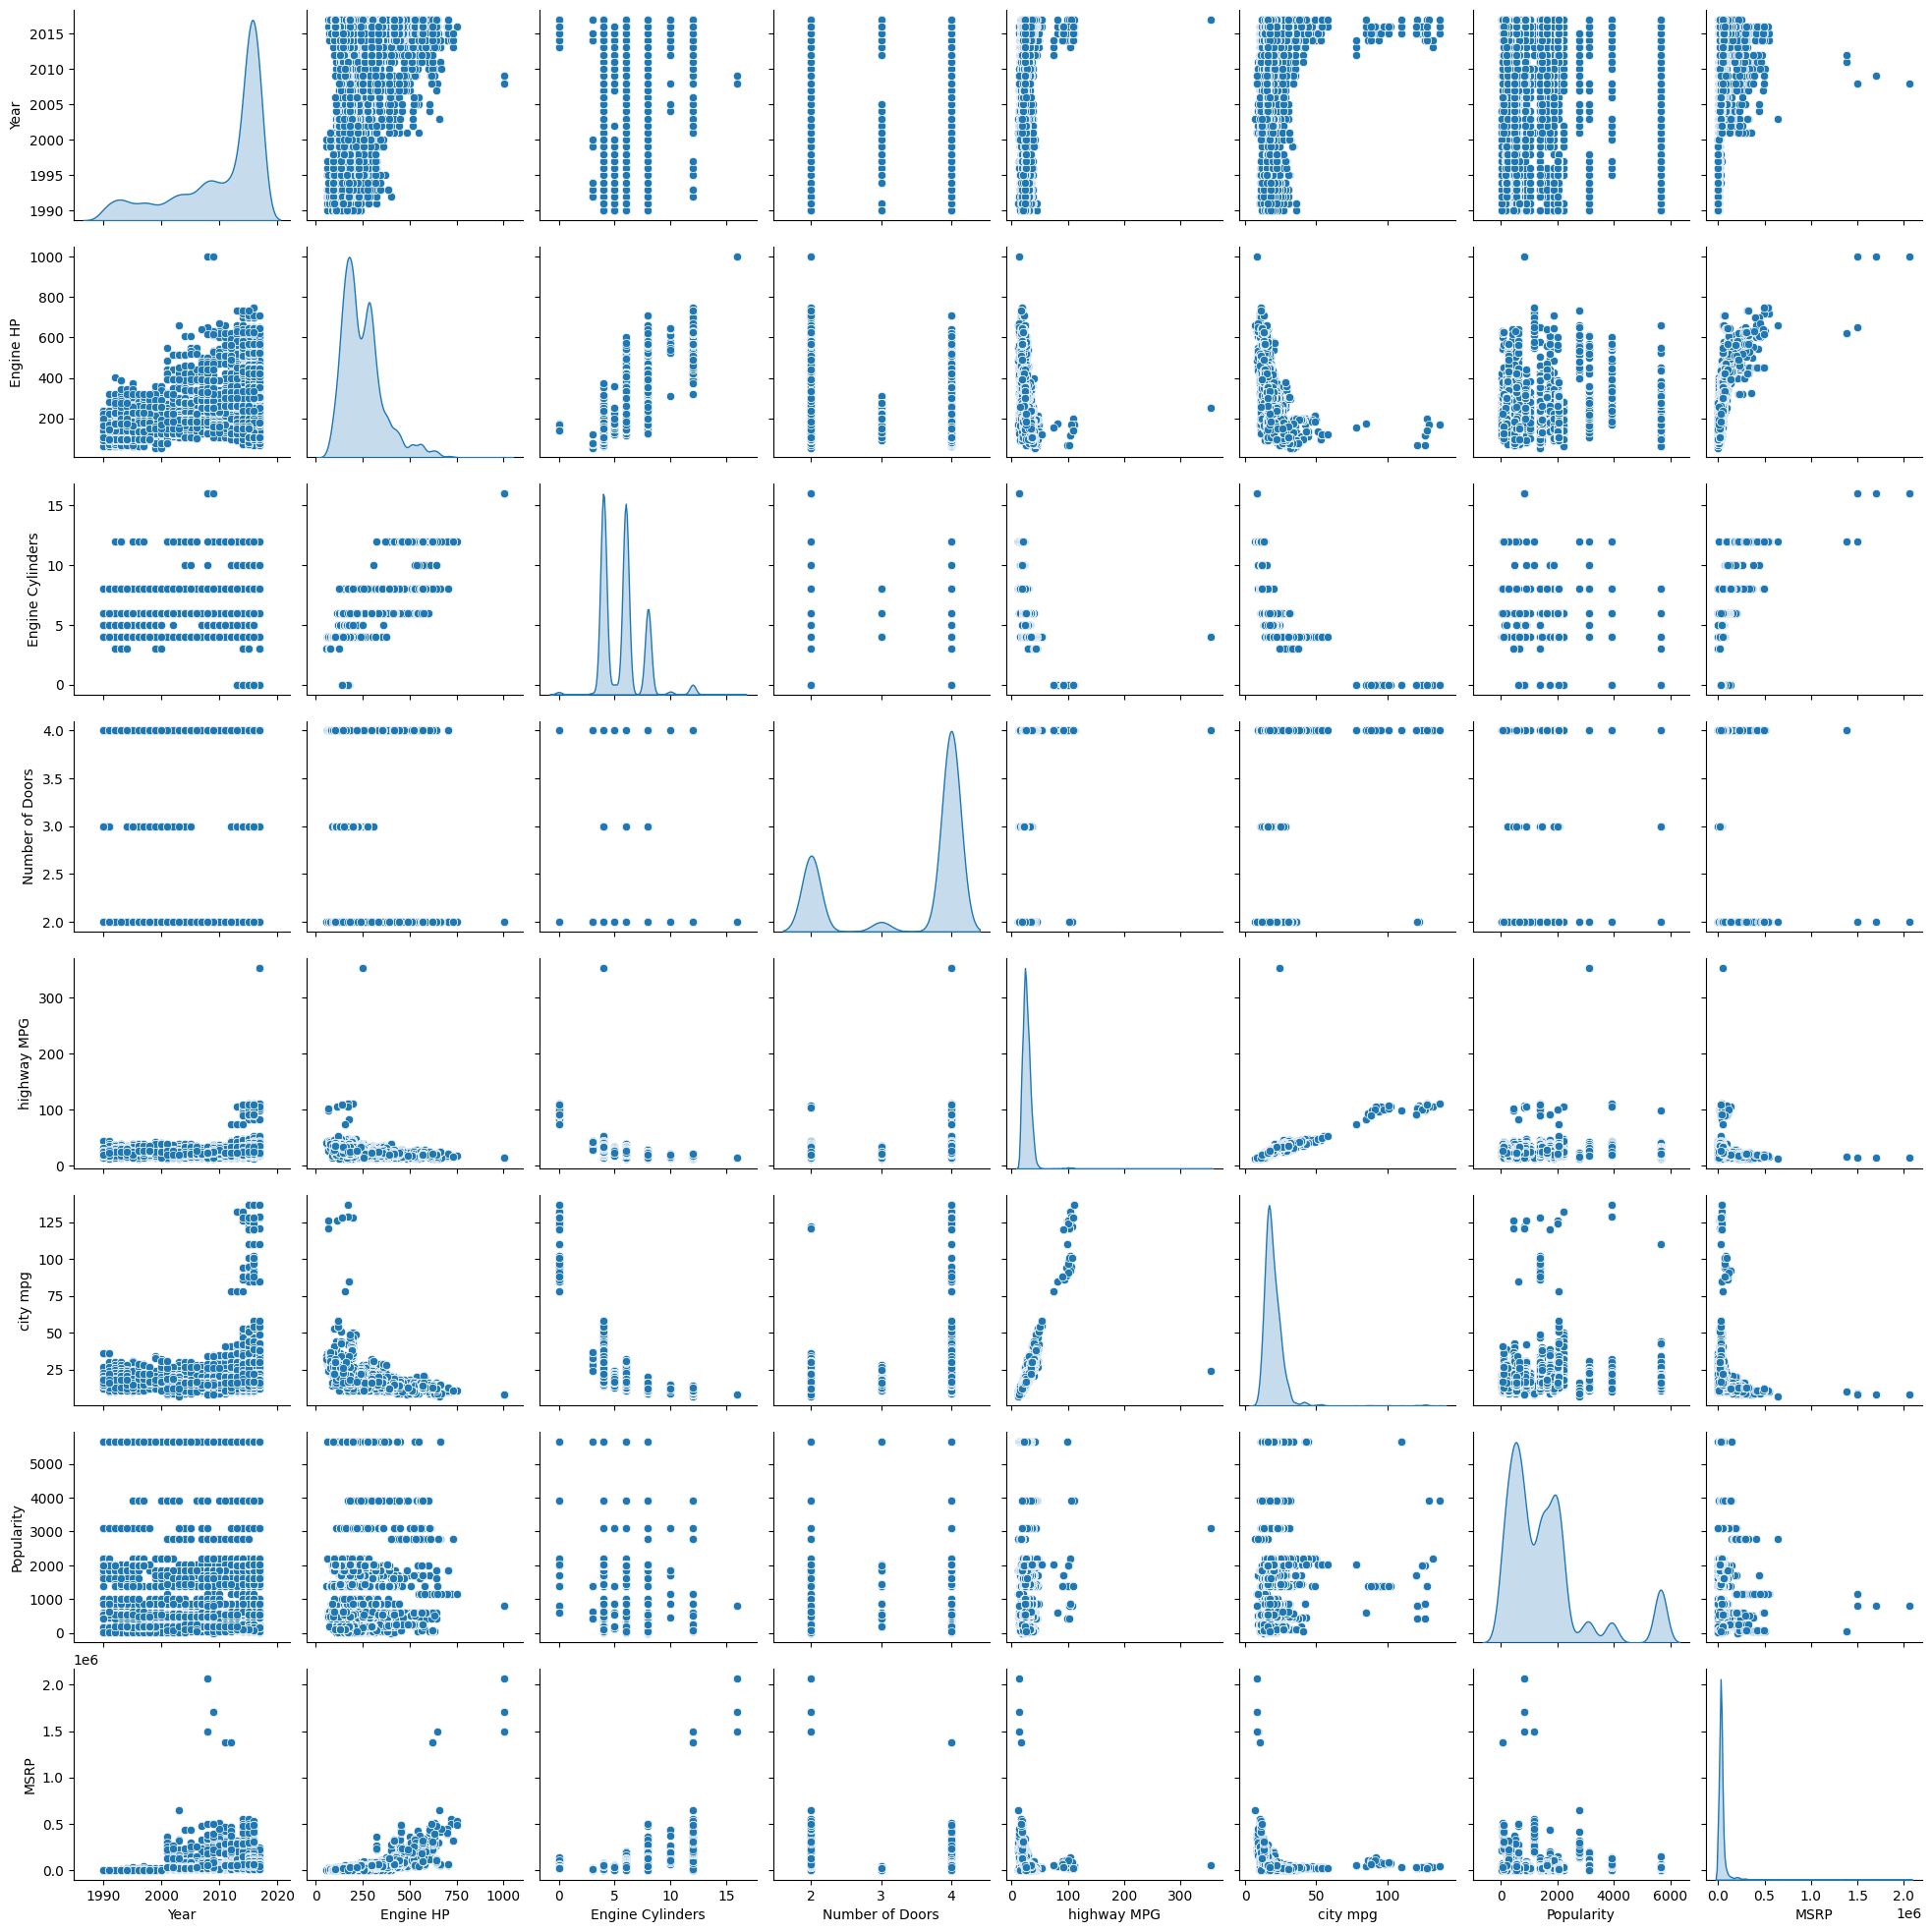

In [167]:
sns.pairplot(car_data,diag_kind='kde') # kde stands for kernel density estimate, i.e. how the distribution is in the population,
                                   # based on gaussian projection of the data at hand
                                   # using a mathematical function also called kernel.